# Mental Health in Tech Industry Draft3

# Introduction

According to the World Health Organization, Mental health is described as a state of well-being where a person is able to cope with the normal stresses of life. This state permits productive work output and allows for meaningful contributions to society. In the United States, Centers for Disease Control and Prevention (CDC) estimates that 1 in 5 adults experience at least one mental health condition every year.

Mental health is an important issue. Mental health affects every area of life and it goes without saying that a person who is dealing with metal health issues is less productive in the work place than one who does not. Dealing with mental health disorders can impact productivity levels. A person who is mentally healthy, is more likely to work more efficiently and provide higher quality work.

It is also clear that western societies do not treat physical issues the same way as mental issues. There tends to be a stigma attached to anything related to mental health. This is not the case with many of our physical issues. The stigma surrouding issues of mental health causes many people to be more careful in how and with whom we speak about their mental health. This is significantly different than how we consider our physical health issues. 

In this report, I will analyze the findings of 5 surveys of tech industry workers related to mental health. The surveys were taken in 2014, 2016, 2017, 2018, and 2019. In total, 4218 people from 79 countries participated in the surveys. The majority of participants were from the United States. I used 3 databases for this analysis:

> * Survey: Contains the year each survey was conducted. The year serves as the SurveyID.
> * Question: Contains 105 questions. Not all questions were used in all the years. Not all questions were given to every individual surveyed. 
> * Answer: Contains 236,898 answers. A participant answered more than one question.

I concentrated on tech industry workers who work for tech companies. I did not choose participants who answered No to the question that asked if their primary role in the company is tech/IT related (QuestionID 9). I did not choose participants who answered No to the question that asked if the employer is primarily a tech company/organization (QuestionID 13). The number of participants in my analysis is 909.

# Goal

The goal of this analysis is to provide clarity about mental health issues encountered by tech workers in tech companies.

# Hypothesis

Do tech industry workers who are more open about issues on mental health also find more resources in their work place and experience more positive attitudes from their supervisors, coworkers and clients? 

# Technical Requirements

1. Download the data from Mental Health in the Tech Industry.
2. Load the data using SQLite and Pandas.
3. Perform exploratory data analysis. This should include creating statistical summaries and charts, testing for anomalies, checking for correlations and other relations between variables, and other EDA elements.
4. Provide clear explanations in your notebook. Your explanations should inform the reader what you are trying to achieve, what results did you get, and what these results mean.
5. Provide suggestions about how your analysis can be improved.

# Libraries

In [105]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import datetime
import matplotlib.dates as mdates

from scipy import stats
from matplotlib.dates import DateFormatter
from IPython.display import display

# Display Parameters

## Display Features

In [106]:
%matplotlib inline
pd.options.display.max_rows = 300000
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 500

## Colors

In [107]:
ord_color = "bisque"
spec_lev1 = "crimson"
spec_lev2 = "orangered"
spec_lev3 = "lightcoral"
male_color = "royalblue"
female_color = "pink"
graph_color1 = "indianred"
graph_color2 = "slategrey"

## Figure Parameters

In [108]:
size = 20

params = {
    "font.family": "Times New Roman",
    "font.size": size,
    "axes.labelsize": size,
    "xtick.labelsize": size * 0.75,
    "ytick.labelsize": size * 0.75,
    "figure.titlesize": size * 1.5,
    "axes.titlesize": size * 1.5,
    "axes.titlepad": size,
    "axes.labelpad": size - 10,
    "lines.linewidth": 2,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.spines.left": False,
    "axes.spines.bottom": False,
    "legend.fontsize": size,
}

# Load and Display Raw Data

In [109]:
db_survey = sqlite3.connect(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\TechMentalHealth\\DataSet\\mental_health.sqlite"
)

# Datasets

## Survey Dataset

In [110]:
df_surveys = pd.read_sql_query("SELECT * FROM Survey", db_survey)

In [111]:
df_surveys

,SurveyID,Description
0,2014,mental health survey for 2014
1,2016,mental health survey for 2016
2,2017,mental health survey for 2017
3,2018,mental health survey for 2018
4,2019,mental health survey for 2019


In [112]:
df_surveys.SurveyID.count()

5

## Question Dataset

In [113]:
df_questions = pd.read_sql_query("SELECT * FROM Question", db_survey)
df_questions.count().to_frame()
df_questions = df_questions.rename(
    columns={"questiontext": "QuestionText", "questionid": "QuestionID"}
)
df_questions.style.set_properties(**{'text-align': 'left'})

,QuestionText,QuestionID
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state or territory do you live in?",4
4,Are you self-employed?,5
5,Do you have a family history of mental illness?,6
6,Have you ever sought treatment for a mental health disorder from a mental health professional?,7
7,How many employees does your company or organization have?,8
8,Is your employer primarily a tech company/organization?,9
9,Does your employer provide mental health benefits as part of healthcare coverage?,10


In [114]:
df_questions.QuestionID.count()

105

## Answer Dataset

In [115]:
df_answers = pd.read_sql_query("SELECT * FROM Answer", db_survey)

In [116]:
df_answers.head()

,AnswerText,SurveyID,UserID,QuestionID
0,37,2014,1,1
1,44,2014,2,1
2,32,2014,3,1
3,31,2014,4,1
4,31,2014,5,1


In [117]:
df_answers.QuestionID.count()

236898

### Section Summary
> * Question ID is from 1 - 118. Number of rows is 1 - 104.
> * 13 numbers are missing in the QuestionID column: 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47.
> * Eliminate question 87
> * Question 15 and 95 are the same.


# Tech Workers in Tech Companies

## QuestionID: 9
Is your employer primarily a tech company/organization?

In [118]:
df_Answer9 = pd.read_sql_query(
    "SELECT USERID FROM Answer where QuestionID = 9 AND AnswerText = '1'",
    db_survey
)

## QuestionID: 31
Is your primary role within your company related to tech/IT?

In [119]:
df_Answer13 = pd.read_sql_query(
    "SELECT USERID FROM Answer where QuestionID = 13 AND AnswerText = '1'",
    db_survey
)

In [120]:
df_TechinTech = pd.merge(df_Answer13, df_Answer9 , on='UserID', how='inner')

In [121]:
Total_TechinTech = df_TechinTech.UserID.count()
Total_TechinTech

909

### Section Summary
> * 
> * 
> * 



# Countries of Residence

In [122]:
df_Answer3 = pd.read_sql_query(
    "SELECT * FROM Answer where QuestionID = 3",
    db_survey
)

In [123]:
df_Country = pd.merge(df_TechinTech, df_Answer3 , on='UserID', how='inner')

In [124]:
df_Country = df_Country.drop(['UserID', 'SurveyID', 'QuestionID'], axis = 1)

In [125]:
df_Country_count = df_Country.AnswerText.value_counts()

In [126]:
df_Country_count = pd.DataFrame(df_Country_count)

In [127]:
df_Country_count = df_Country_count.reset_index()

In [128]:
df_Country_count = df_Country_count.rename(
    columns={"index": "Country", "AnswerText": "Count"}
)

In [129]:
df_Country_count["Country"] = df_Country_count["Country"].replace(
    {
        "-1": "Other",
        "Bahamas, The": "Bahamas",
        "United States of America": 'United States'
    }
)

In [130]:
Total_OtherCountries = df_Country_count[8:][['Count']].sum()
Total_OtherCountries = Total_OtherCountries.Count

In [131]:
df_Country_count = df_Country_count[df_Country_count.Count >= 14]

In [132]:
df_Country_count.loc[13] = ['Other', Total_OtherCountries] 

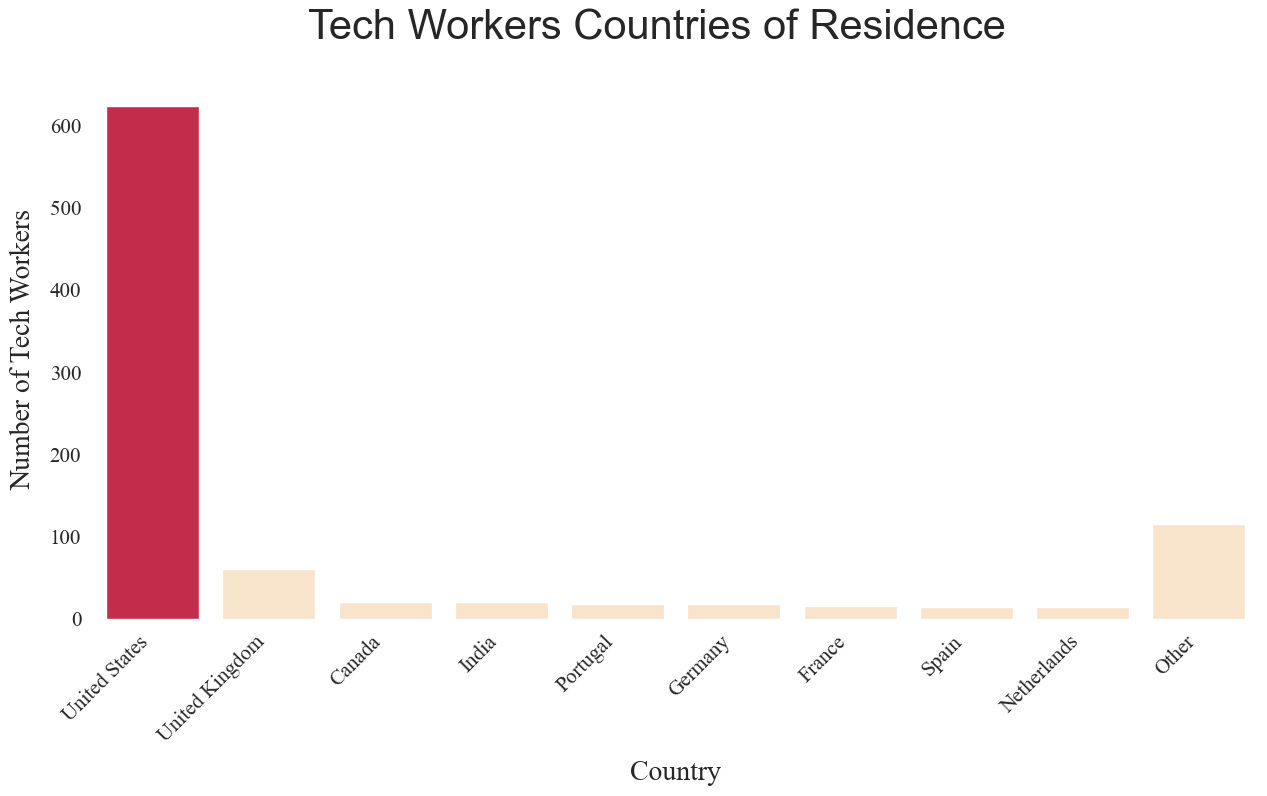

In [133]:
plt.rcParams.update(params)

fig, axes = plt.subplots(1, 1, figsize=(15, 7))
sns.set(style="white")

chart = sns.barplot(
    ax=axes,
    x="Country",
    y="Count",
    data=df_Country_count,
    errorbar=None,
    palette=[ord_color if x != "United States" else spec_lev1
        for x in df_Country_count["Country"]],
)


plt.xlabel("Country")
plt.ylabel("Number of Tech Workers")
plt.xticks()
plt.yticks()

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment="right")
plt.suptitle("Tech Workers Countries of Residence")

plt.show()

### Section Summary
> * 
> * 
> * 



# Gender

In [134]:
df_Answer2 = pd.read_sql_query("SELECT * FROM Answer where QuestionID = 2", db_survey)

In [135]:
df_Gender = pd.merge(df_TechinTech, df_Answer2 , on='UserID', how='inner')

In [136]:
df_Gender_count = df_Gender.AnswerText.value_counts()
df_Gender_count = pd.DataFrame(df_Gender_count)
df_Gender_count = df_Gender_count.reset_index()

In [137]:
df_Gender_count = df_Gender_count.rename(
    columns={"index": "Gender", "AnswerText": "Count"}
)

In [138]:
df_Gender_count["Gender"] = df_Gender_count["Gender"].replace(
    {"female": "Female", "male": "Male", "MALE": "Male"}
)

In [139]:
df_Gender_count["Gender"] = np.where(
    (df_Gender_count["Gender"] == "Male") | (df_Gender_count["Gender"] == "Female"),
    df_Gender_count["Gender"],
    "Other",
)

In [140]:
df_Gender_count = df_Gender_count.groupby("Gender").sum()
df_Gender_count = df_Gender_count.reset_index()

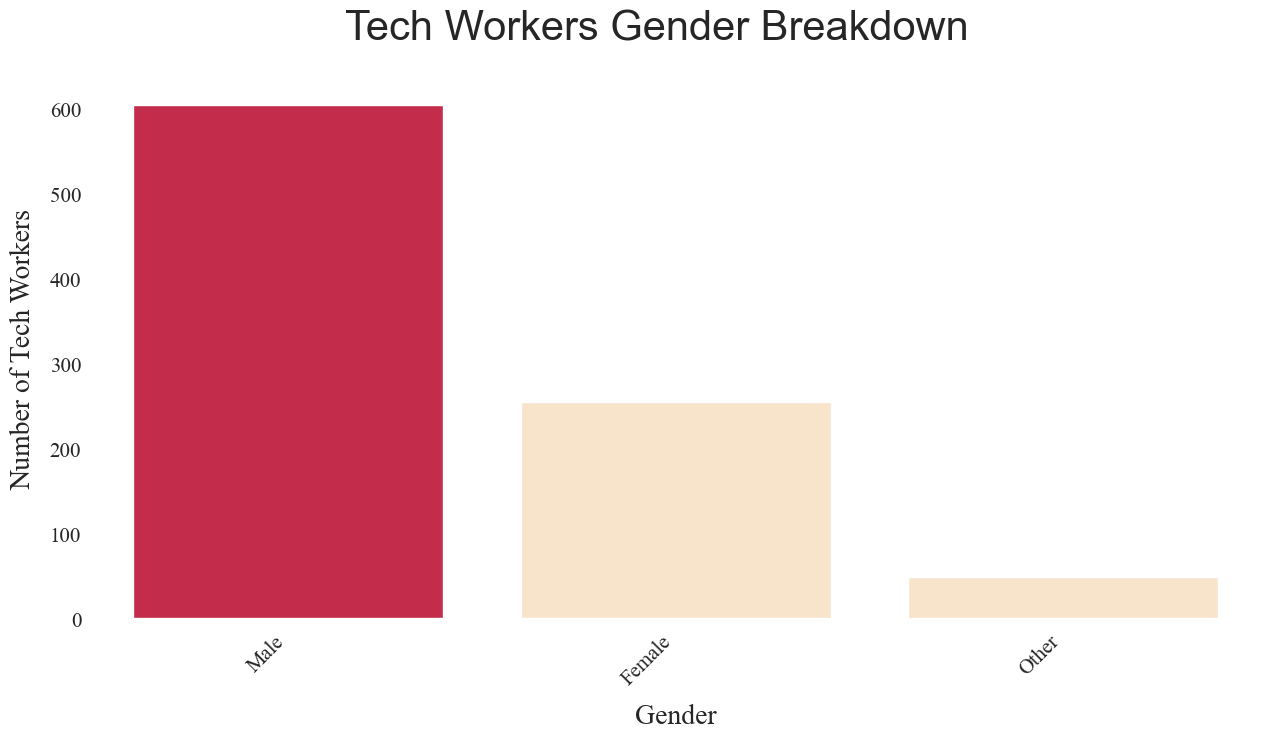

In [141]:
plt.rcParams.update(params)

fig, axes = plt.subplots(1, 1, figsize=(15, 7))
sns.set(style="white")

chart = sns.barplot(
    ax=axes,
    x="Gender",
    y="Count",
    data=df_Gender_count,
    order=(df_Gender_count.sort_values('Count', ascending = False).Gender),
    errorbar=None,
    palette=[ord_color if x != "Female" else spec_lev1
        for x in df_Gender_count["Gender"]],
)


plt.xlabel("Gender")
plt.ylabel("Number of Tech Workers")
plt.xticks()
plt.yticks()

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment="right")
plt.suptitle("Tech Workers Gender Breakdown")

plt.show()

### Section Summary
> * 
> * 
> * 



# Age

In [142]:
df_Answer1 = pd.read_sql_query(
    "SELECT * FROM Answer where QuestionID = 1", db_survey
)

In [143]:
df_Answer1 = pd.merge(df_TechinTech, df_Answer1 , on='UserID', how='inner')

In [144]:
df_Answer1["AnswerText"] = df_Answer1["AnswerText"].astype(int)

In [145]:
df_Answer1.sort_values("AnswerText", inplace=True)

In [146]:
df_Answer1 = df_Answer1[df_Answer1.AnswerText >= 20]
df_Answer1 = df_Answer1[df_Answer1.AnswerText <= 75]

In [147]:
df_Age_count = df_Answer1.AnswerText.value_counts()
df_Age_count = pd.DataFrame(df_Age_count)
df_Age_count = df_Age_count.reset_index()

In [148]:
df_Age_count = df_Age_count.rename(columns={"index": "Age", "AnswerText": "Count"})

In [149]:
df_Age_count.loc[df_Age_count['Age'].between(20, 29, 'both'), 'Range'] = '20s'
df_Age_count.loc[df_Age_count['Age'].between(30, 39, 'both'), 'Range'] = '30s'
df_Age_count.loc[df_Age_count['Age'].between(40, 49, 'both'), 'Range'] = '40s'
df_Age_count.loc[df_Age_count['Age'].between(50, 59, 'both'), 'Range'] = '50s'
df_Age_count.loc[df_Age_count['Age'].between(60, 69, 'both'), 'Range'] = '60s'
df_Age_count.loc[df_Age_count['Age'].between(70, 79, 'both'), 'Range'] = '70s'

In [150]:
df_Age_count_grouped = df_Age_count.groupby('Range')['Count'].sum()
df_Age_count_grouped = df_Age_count_grouped.to_frame()
df_Age_count_grouped = df_Age_count_grouped.reset_index()

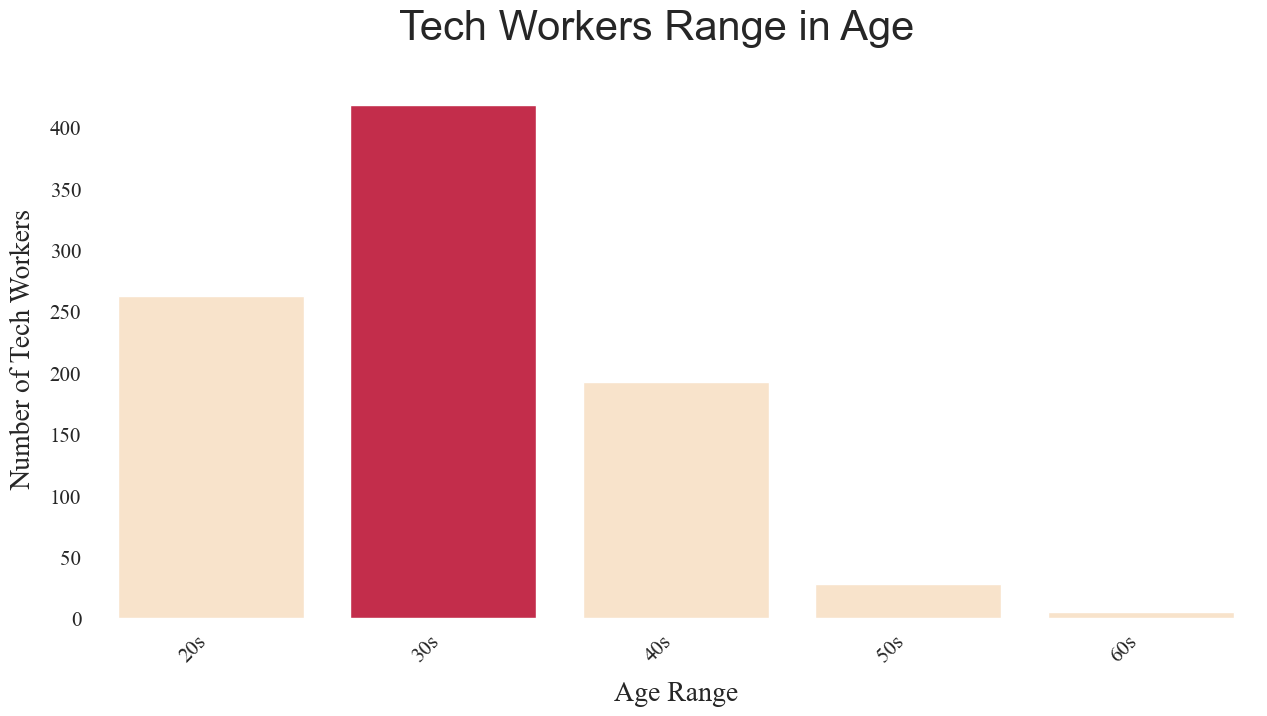

In [151]:
plt.rcParams.update(params)

fig, axes = plt.subplots(1, 1, figsize=(15, 7))
sns.set(style="white")

chart = sns.barplot(
    ax=axes,
    x="Range",
    y="Count",
    data=df_Age_count_grouped,
    errorbar=None,
    palette=[ord_color if x != "30s" else spec_lev1
        for x in df_Age_count_grouped["Range"]],
)


plt.xlabel("Age Range")
plt.ylabel("Number of Tech Workers")
plt.xticks()
plt.yticks()

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment="right")
plt.suptitle("Tech Workers Range in Age")

plt.show()

### Section Summary
> * 
> * 
> * 



# Mental Disorders in Tech Industry Workers

## Family History of Mental Illness

In [152]:
df_Answer6 = pd.read_sql_query(
    "SELECT USERID FROM Answer where QuestionID = 6 AND AnswerText = 'Yes'",
    db_survey
)

In [153]:
df_FamilyDisorder = pd.merge(df_TechinTech, df_Answer6 , on='UserID', how='inner')

In [154]:
Total_FamilyDisorder = df_FamilyDisorder.count()

In [155]:
Total_NoFamilyDisorder = Total_TechinTech - Total_FamilyDisorder 

## Past Diagnosis of Mental Health Disorder

In [156]:
df_Answer34 = pd.read_sql_query(
    "SELECT USERID FROM Answer where QuestionID = 34 AND AnswerText = 'Yes'",
    db_survey
)

In [157]:
df_PastDisorder = pd.merge(df_TechinTech, df_Answer34 , on='UserID', how='inner')

In [158]:
Total_PastDisorder = df_PastDisorder.count()
Total_PastDisorder.UserID

371

In [159]:
Total_NoPastDisorder = Total_TechinTech - Total_PastDisorder 

## Current Mental Health Disorder

In [160]:
df_Answer33 = pd.read_sql_query(
    "SELECT UserID FROM Answer where QuestionID = 33 AND AnswerText = 'Yes'",
    db_survey
)

In [161]:
df_CurrentDisorder = pd.merge(df_TechinTech, df_Answer33 , on='UserID', how='inner')

In [162]:
Total_CurrentDisorder = df_CurrentDisorder.count()

In [163]:
Total_NoCurrentDisorder = Total_TechinTech - Total_CurrentDisorder 

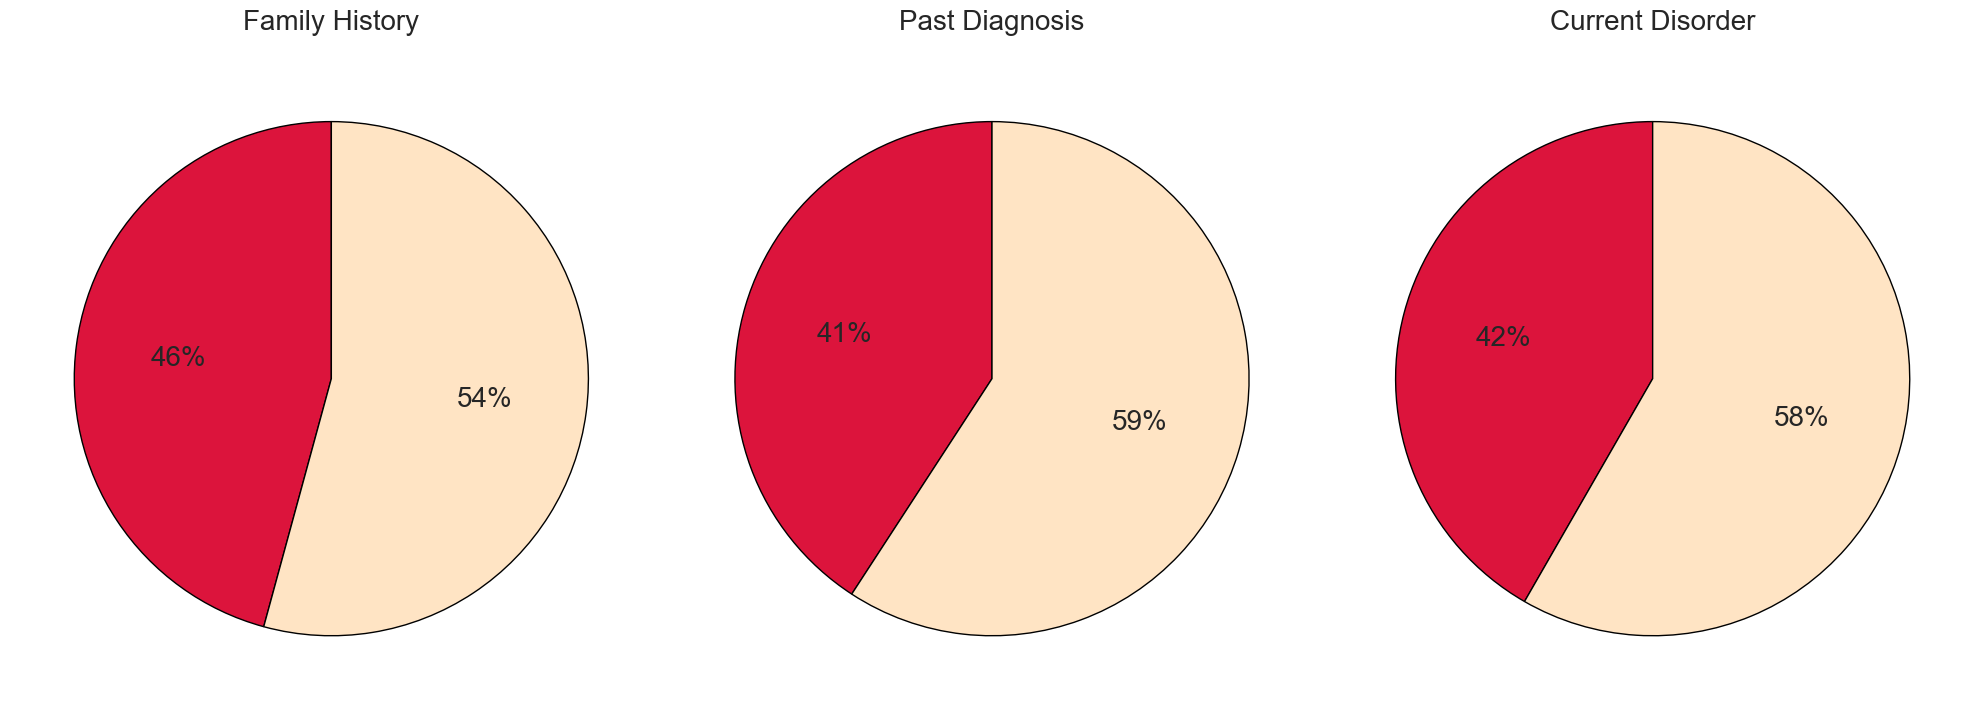

In [164]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 7))

data_FamilyDisorder = [Total_FamilyDisorder.UserID, Total_NoFamilyDisorder.UserID]
data_PastDisorder = [Total_PastDisorder.UserID, Total_NoPastDisorder.UserID]
data_CurrentDisorder = [Total_CurrentDisorder.UserID, Total_NoCurrentDisorder.UserID]

labels_MentalDisorder = ["Yes", "No"]


ax1.pie(
    data_FamilyDisorder,
    startangle=90,
    colors = [spec_lev1, ord_color],
    autopct="%0.0f%%",
    wedgeprops={"edgecolor": "black"},
    textprops={"fontsize": 20},
    
)

ax2.pie(
    data_PastDisorder,
    startangle=90,
    colors = [spec_lev1, ord_color],
    autopct="%0.0f%%",
    wedgeprops={"edgecolor": "black"},
    textprops={"fontsize": 20},
   
)

ax3.pie(
    data_CurrentDisorder,
    startangle=90,
    colors = [spec_lev1, ord_color],
    autopct="%0.0f%%",
    wedgeprops={"edgecolor": "black"},
    textprops={"fontsize": 20},

)

ax1.set_title('Family History', fontsize=20)
ax2.set_title('Past Diagnosis', fontsize=20)
ax3.set_title('Current Disorder', fontsize=20)

plt.tight_layout()

plt.show()

### Section Summary
> * 
> * 
> * 



# Attitude Toward Mental Health in the Tech Industry

## Question ID: 11 
Is your anonimity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?

In [165]:
df_Answer11 = pd.read_sql_query("SELECT * FROM Answer where QuestionID = 11", db_survey)
Total_Answer11 = df_Answer11.UserID.count()

In [166]:
df_Answer11_Yes = pd.read_sql_query(
    "SELECT UserID FROM Answer where QuestionID = 11 AND AnswerText = 'Yes'", db_survey
)
Yes_Answer11 = df_Answer11_Yes.UserID.count()

In [167]:
df_Answer11TechinTech = pd.merge(
    df_TechinTech, df_Answer11_Yes, on="UserID", how="inner"
)

In [168]:
TechinTech_Answer11 = df_Answer11TechinTech.UserID.count()

## Question ID: 17 
If a mental health issue prompted you to request a medical leave from work, how easy or difficult would it be to ask for that leave?

In [169]:
df_Answer17 = pd.read_sql_query("SELECT * FROM Answer where QuestionID = 17", db_survey)
Total_Answer17 = df_Answer17.UserID.count()

In [170]:
df_Answer17_Yes = pd.read_sql_query(
    "SELECT UserID FROM Answer where QuestionID = 17 AND (AnswerText = 'Very easy' OR AnswerText = 'Somewhat easy')",
    db_survey,
)
Yes_Answer17 = df_Answer17_Yes.UserID.count()

In [171]:
df_Answer17TechinTech = pd.merge(
    df_TechinTech, df_Answer17_Yes, on="UserID", how="inner"
)

In [172]:
TechinTech_Answer17 = df_Answer17TechinTech.UserID.count()

## Question ID: 83 
Have you observed or experienced supportive or well handled response to a mental health issue in your current or previous workplace?

In [173]:
df_Answer83 = pd.read_sql_query("SELECT * FROM Answer where QuestionID = 83", db_survey)
Total_Answer83 = df_Answer83.UserID.count()

In [174]:
df_Answer83_Yes = pd.read_sql_query(
    "SELECT UserID FROM Answer where QuestionID = 83 AND (AnswerText = 'Yes, I experienced' OR AnswerText = 'Yes, I observed')",
    db_survey,
)
Yes_Answer83 = df_Answer83_Yes.UserID.count()

In [175]:
df_Answer83TechinTech = pd.merge(df_TechinTech, df_Answer83_Yes, on="UserID", how="inner")

In [176]:
TechinTech_Answer83 = df_Answer83TechinTech.UserID.count()

##  Score: Positive Attitude Toward Mental Illness

In [177]:
df_attitude = pd.merge(
    pd.merge(df_Answer11TechinTech, df_Answer17TechinTech, on="UserID"),
    df_Answer83TechinTech,
    on="UserID",
    how="inner",
)
df_attitude.UserID.count()

117

In [178]:
Attitude_Score = (
    (TechinTech_Answer11 * Yes_Answer11)
    + (TechinTech_Answer17 * Yes_Answer17)
    + (TechinTech_Answer83 * Yes_Answer83)
) / (Total_Answer11 + Total_Answer17 + Total_Answer83)
Attitude_Score = int(Attitude_Score)
Attitude_Score

127

### Section Summary
> * 
> * 
> * 



# Access to Mental Health Resources in the Tech Industry

## QuestionID: 10 
Does employer provide mental health benefits as part of healthcare coverage?

In [179]:
df_Answer10 = pd.read_sql_query("SELECT * FROM Answer where QuestionID = 10", db_survey)
Total_Answer10 = df_Answer10.UserID.count()
Total_Answer10

4218

In [180]:
df_Answer10_Yes = pd.read_sql_query(
    "SELECT UserID FROM Answer where QuestionID = 10 AND AnswerText = 'Yes'", db_survey
)
Yes_Answer10 = df_Answer10_Yes.UserID.count()
Yes_Answer10

1744

In [181]:
df_Answer10TechinTech = pd.merge(
    df_TechinTech, df_Answer10_Yes, on="UserID", how="inner"
)

In [182]:
TechinTech_Answer10 = df_Answer10TechinTech.UserID.count()
TechinTech_Answer10

498

## QuestionID: 14 
Do you know options for mental health care available under your employer provided health coverage?

In [183]:
df_Answer14 = pd.read_sql_query("SELECT * FROM Answer where QuestionID = 14", db_survey)
Total_Answer14 = df_Answer14.UserID.count()
Total_Answer14

2958

In [184]:
df_Answer14_Yes = pd.read_sql_query(
    "SELECT UserID FROM Answer where QuestionID = 14 AND AnswerText = 'Yes'", db_survey
)
Yes_Answer14 = df_Answer14_Yes.UserID.count()
Yes_Answer14

869

In [185]:
df_Answer14TechinTech = pd.merge(
    df_TechinTech, df_Answer14_Yes, on="UserID", how="inner"
)

In [186]:
TechinTech_Answer14 = df_Answer14TechinTech.UserID.count()
TechinTech_Answer14

378

## QuestionID: 16 
Does employer offer resources to learn more about mental health disorders and options for seeking help?

In [187]:
df_Answer16 = pd.read_sql_query("SELECT * FROM Answer where QuestionID = 16", db_survey)
Total_Answer16 = df_Answer16.UserID.count()
Total_Answer16

2958

In [188]:
df_Answer16_Yes = pd.read_sql_query(
    "SELECT UserID FROM Answer where QuestionID = 16 AND AnswerText = 'Yes'", db_survey
)
Yes_Answer16 = df_Answer16_Yes.UserID.count()
Yes_Answer16

702

In [189]:
df_Answer16TechinTech = pd.merge(
    df_TechinTech, df_Answer16_Yes, on="UserID", how="inner"
)

In [190]:
TechinTech_Answer16 = df_Answer16TechinTech.UserID.count()
TechinTech_Answer16

255

##  Score: Access to Mental Health Resources

In [191]:
df_access = pd.merge(
    pd.merge(df_Answer10TechinTech, df_Answer14TechinTech, on="UserID"),
    df_Answer16TechinTech,
    on="UserID",
    how="inner",
)
df_access.UserID.count()

176

In [192]:
Access_Score = (
    (TechinTech_Answer10 * Yes_Answer10)
    + (TechinTech_Answer14 * Yes_Answer14)
    + (TechinTech_Answer16 * Yes_Answer16)
) / (Total_Answer10 + Total_Answer14 + Total_Answer16)
Access_Score = int(Access_Score)
Access_Score

135

### Section Summary
> * 
> * 
> * 



# Openness to Discuss Mental Health in the Tech Industry

## QuestionID: 12
Would you bring up a mental health issue with a potential employer in an interview?

In [193]:
df_Answer12 = pd.read_sql_query(
    "SELECT * FROM Answer where QuestionID = 12",
    db_survey
)
Total_Answer12 = df_Answer12.UserID.count()

In [194]:
df_Answer12_Yes = pd.read_sql_query(
    "SELECT UserID FROM Answer where QuestionID = 12 AND AnswerText = 'Yes'",
    db_survey
)
Yes_Answer12 = df_Answer12_Yes.UserID.count()

In [195]:
df_Answer12TechinTech = pd.merge(df_TechinTech, df_Answer12_Yes, on='UserID', how='inner')

In [196]:
TechinTech_Answer12 = df_Answer12TechinTech.UserID.count()

## QuestionID:  18
Would you feel comfortable discussing a mental health issue with a coworker?  

In [197]:
df_Answer18 = pd.read_sql_query(
    "SELECT * FROM Answer where QuestionID = 18",
    db_survey
)
Total_Answer18 = df_Answer18.UserID.count()

In [198]:
df_Answer18_Yes = pd.read_sql_query(
    "SELECT UserID FROM Answer where QuestionID = 18 AND AnswerText = 'Yes'",
    db_survey
)
Yes_Answer18 = df_Answer18_Yes.UserID.count()

In [199]:
df_Answer18TechinTech = pd.merge(df_TechinTech, df_Answer18_Yes, on='UserID', how='inner')

In [200]:
TechinTech_Answer18 = df_Answer18TechinTech.UserID.count()

## QuestionID: 19
Would you feel comfortable discussing a mental health issue with a direct supervisor?

In [201]:
df_Answer19 = pd.read_sql_query(
    "SELECT * FROM Answer where QuestionID = 19",
    db_survey
)
Total_Answer19 = df_Answer19.UserID.count()

In [202]:
df_Answer19_Yes = pd.read_sql_query(
    "SELECT UserID FROM Answer where QuestionID = 19 AND AnswerText = 'Yes'",
    db_survey
)
Yes_Answer19 = df_Answer19_Yes.UserID.count()

In [203]:
df_Answer19TechinTech = pd.merge(df_TechinTech, df_Answer19_Yes, on='UserID', how='inner')

In [204]:
TechinTech_Answer19 = df_Answer19TechinTech.UserID.count()

## Score: Openness to Discuss Mental Health Issues

In [205]:
df_openness = pd.merge(
    pd.merge(df_Answer12TechinTech, df_Answer18TechinTech, on="UserID"),
    df_Answer19TechinTech,
    on="UserID",
    how="inner",
)
df_openness.UserID.count()

28

In [206]:
Openness_Score = (
    (TechinTech_Answer12 * Yes_Answer12)
    + (TechinTech_Answer18 * Yes_Answer18)
    + (TechinTech_Answer19 * Yes_Answer19)
) / (Total_Answer12 + Total_Answer18 + Total_Answer19)
Openness_Score = int(Openness_Score)
Openness_Score

56

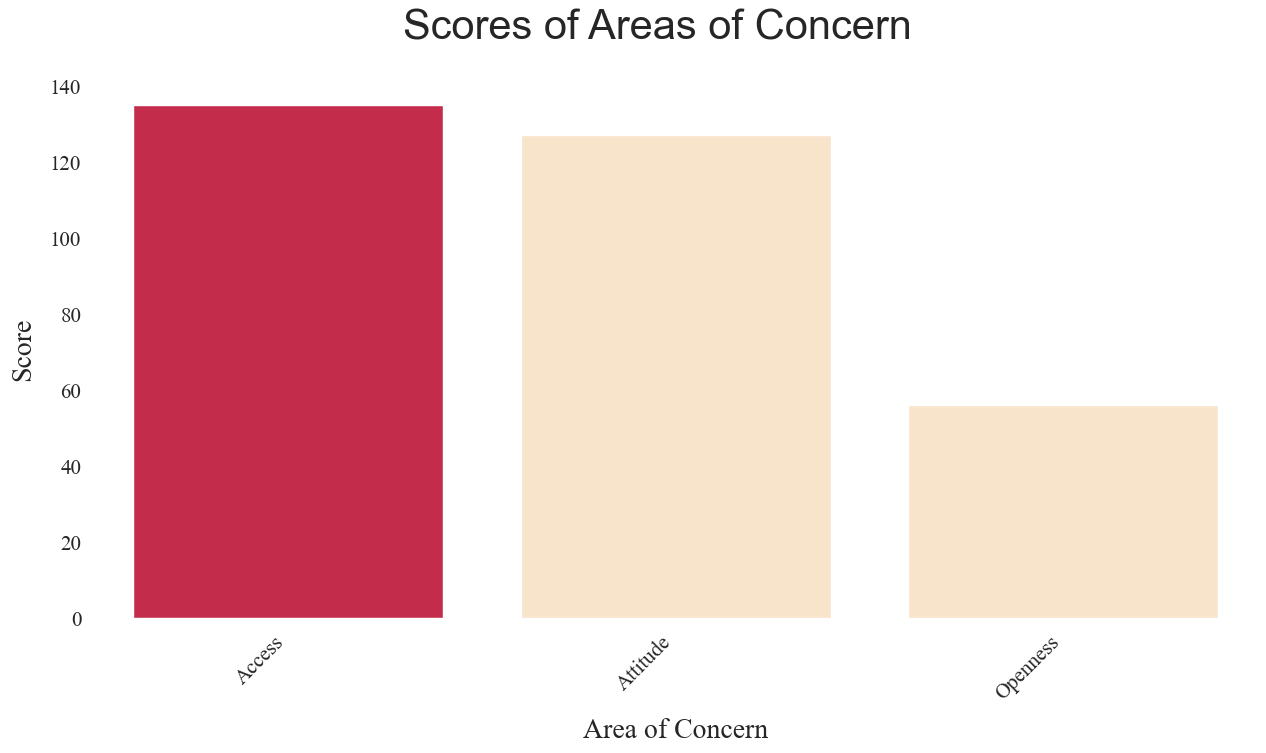

In [207]:
plt.rcParams.update(params)

fig, axes = plt.subplots(1, 1, figsize=(15, 7))
sns.set(style="white")

scores = pd.DataFrame({'Area':['Access', 'Attitude', 'Openness'], 'Value':[Access_Score, Attitude_Score, Openness_Score]})

chart = sns.barplot(
    ax=axes,
    x="Area",
    y="Value",
    data=scores,
    errorbar=None,
    palette=[ord_color if x != "Access" else spec_lev1
        for x in scores["Area"]],
)


plt.xlabel("Area of Concern")
plt.ylabel("Score")
plt.xticks()
plt.yticks()

chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment="right")
plt.suptitle("Scores of Areas of Concern")

plt.show()

### Section Summary
> * 
> * 
> * 



# Conclusions
> * 
> * 
> * 
> * 
> * 
> * 
> * 
> * 
> * 



# Suggestions for Improvement
> * 
> * 
> * 
> * 
> * 
> * 
> * 
> * 
> * 


# Appendix
